# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import minimize
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from inauguralproject import MarketModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

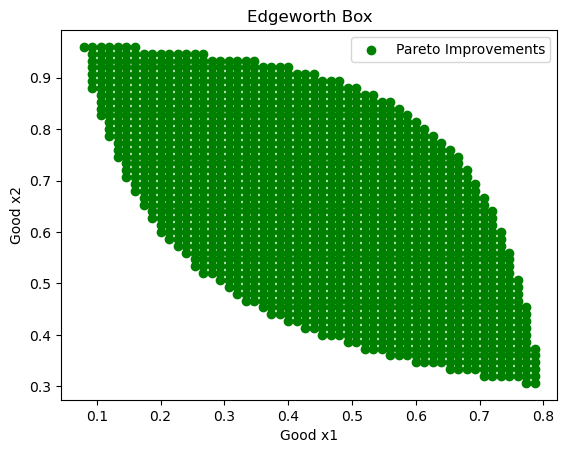

In [78]:
# code for solving the model (remember documentation and comments)

# Example usage
market_model = MarketModel()
market_model.plot_edgeworth_box()


# Question 2

Explain your code and procedure

In [80]:
# code

market = MarketModel()
market.calculate_errors()

For p1 = 0.50, Error: ε(p, ω) = (0.5333, -0.2667)
For p1 = 0.70, Error: ε(p, ω) = (0.2095, -0.1467)
For p1 = 0.90, Error: ε(p, ω) = (0.0296, -0.0267)
For p1 = 1.10, Error: ε(p, ω) = (-0.0848, 0.0933)
For p1 = 1.30, Error: ε(p, ω) = (-0.1641, 0.2133)
For p1 = 1.50, Error: ε(p, ω) = (-0.2222, 0.3333)
For p1 = 1.70, Error: ε(p, ω) = (-0.2667, 0.4533)
For p1 = 1.90, Error: ε(p, ω) = (-0.3018, 0.5733)
For p1 = 2.10, Error: ε(p, ω) = (-0.3302, 0.6933)
For p1 = 2.30, Error: ε(p, ω) = (-0.3536, 0.8133)
For p1 = 2.50, Error: ε(p, ω) = (-0.3733, 0.9333)


# Question 3

Explain your code and procedure

In [ ]:
# code
market = MarketModel()

# Finding p1 that satisfies the market clearing condition using fsolve. This is done by finding the price p1, that makes the funtion return 0. Meaning there is no exces demand or supply.
market_clearing_price = fsolve(market.market_clearing_condition, x0=1)  # Starting guess at p1 = 1
print(f"Market clearing price for good 1 (p1): {market_clearing_price[0]}")


Market clearing price for good 1 (p1): 0.9444444444444446


# Question 4.a

In [ ]:
# Display the results
import numpy as np
# Parameters
N = 75
alpha = 1/3

# Initial endowments
w_1_A = 0.8
w_2_A = 0.3

# Price of good 2 (numeraire)
p_2 = 1

# Agent A's utility function
def u_A(x_1, x_2):
    return x_1**alpha * x_2**(1-alpha)

# Agent A's demand functions for goods 1 and 2
def A_demand_1(p_1, w_1_A, w_2_A):
    return alpha * (p_1 * w_1_A + p_2*w_2_A) / p_1

def A_demand_2(p_1, w_1_A, w_2_A):
    return (1-alpha) * (p_1 * w_1_A + p_2*w_2_A) / p_2

# Create the price grid P1
P1 = 0.5 + 2*np.arange(N)/N

# Optimization loop
max_utility = -np.inf
optimal_p1 = None

for p_1 in P1:
    # Calculate demands for A at this price
    x_1_A = A_demand_1(p_1, w_1_A, w_2_A)
    x_2_A = A_demand_2(p_1, w_1_A, w_2_A)

    # Calculate utility for A at this price
    current_utility = u_A(x_1_A, x_2_A)

    # Update maximum utility and optimal price if current utility is higher
    if current_utility > max_utility:
        max_utility = current_utility
        optimal_p1 = p_1

# Display the results
print("Optimal price p1 in P1:", optimal_p1)
print("Maximum utility for A:", max_utility)

Optimal price p1 in P1: 2.4733333333333336
Maximum utility for A: 0.891562906874459


# Question 4.b

In [ ]:
market = MarketModel()

print("Optimal price p1 in P1:", market.optimal_p1)
print("Maximum utility for A:", market.max_utility)  